# INFORMACIÓN DEL PROYECTO

## El viaje del usuario: ¿Qué factores influyen en la conversión de trial a premium?
### Análisis sobre las razones que hay detrás de la conversión en un modelo de suscripción


## Introducción

### Análisis del Comportamiento de los Usuarios

Este proyecto tiene como finalidad analizar el comportamiento de los usuarios de una app, especialmente en relación con el abandono al finalizar la prueba gratuita de 7 días.

A través de técnicas de **Análisis Exploratorio de Datos (EDA)**, se investigarán las tasas de retención y las razones subyacentes al abandono en este punto. Este análisis proporcionará información valiosa para:

- Mejorar las estrategias de retención.
- Optimizar la experiencia del usuario.
- Reducir la tasa de abandono.

### Objetivos

El principal objetivo es incrementar la tasa de conversión de prueba a suscripción premium, aumentando la permanencia de los usuarios y optimizando las métricas clave de la aplicación. Para ello, se busca:

Identificar patrones de comportamiento que diferencian a los usuarios que se convierten de aquellos que abandonan.

Detectar puntos críticos dentro del viaje del usuario que influyen en la decisión de cancelar o continuar.

Proponer estrategias basadas en datos para mejorar la conversión y fidelización.

### Hipótesis

- Examinar si los usuarios que seleccionan diferentes razones para usar la app tienen tasas de conversión distintas.

## Hipótesis 1
- Los usuarios que completan todas las pantallas de incorporación (ONBOARDING COMPLETED) tienen una tasa de conversión a una suscripción de pago (TRIAL_CONVERTED) más alta que aquellos que no completan el onboarding

## Hipótesis 2
- La falta de interacción durante el trial de 7 días es directamente proporcional con la cancelación.

## Hipótesis 3
- Los usuarios que se registran desde ciertos países tienen una tasa de conversión más alta a la suscripción de pago (TRIAL_CONVERTED) que aquellos que se registran desde otros países.(Evaluar si las tasas de conversión son consistentes en todos los países, identificando posibles diferencias regionales)

## Hipótesis 4
 -  Los usuarios que provienen de canales de marketing orgánicos tienen mayor probabilidad de conversión.

## Hipótesis 5
 - Los usuarios que suben una foto (PHOTO_UPLOADED) tienen una tasa de conversión más alta a suscripción de pago que aquellos que no suben una foto

## Hipótesis 6
- Los usuarios que han abierto y respondido una conversación (CONVERSATION_OPENED y CONVERSATION_ANSWERED) tienen una tasa de conversión más alta a una suscripción de pago (TRIAL_CONVERTED) en comparación con aquellos que no han abierto ni respondido conversaciones

## Hipótesis 7
- Día de la semana con mayor número de descargas de la aplicación.

## Hipótesis 8
- Análisis de los usuarios según su país de procedencia y los canales que utilizan para acceder a la aplicación.

***

In [10]:
# 1. Importa pandas, pyplot y seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [ ]:
# guarda en variables los datasets y su fuente
df = pd.read_csv("data/dataset_eda.csv")
df

,USER ID,FIRST SEEN TIMESTAMP,COUNTRY,ATTRIBUTION CHANNEL,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,...,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
0,gnm6qjiAY2e7sBejh7EiQBpWZBJ3,2024-03-04T03:07:29.201Z,United States,Organic,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,1,1
1,Wlt9juveBehuBlKKVWgR3qkEVV52,2024-03-04T02:31:26.549Z,United States,Google Ads,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
2,ir27ubxNhoYwQwXO0eK6zYq9mAJ3,2024-03-04T06:16:04.500Z,United States,Google Ads,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,x837S9H2ufbRZXGUZ2jUmZq2oLf2,2024-03-04T11:00:36.658Z,Australia,Organic,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,wDisQWuU6cNbgLCpV1ZaVP7VVRA2,2024-03-04T12:30:44.841Z,South Africa,Organic,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,QtRTNhGrHROn023en6jPxaFspGK2,2024-03-12T00:37:27.297Z,United States,Google Ads,1,1,1,0,1,1,...,0,1,1,1,1,1,1,0,1,1
39996,5Af9WqbmihfeMUaQZAf6xF376Dd2,2024-03-12T01:00:11.388Z,United States,Partner Invite,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
39997,3Q7KCKy2kcSqJ1HX3wLdyu9YlAf2,2024-03-12T01:33:18.550Z,United States,Partner Invite,1,0,0,1,0,1,...,0,1,1,1,1,1,1,1,1,1
39998,fAOJQ2q8ahVOSoRcXXY9U3Gwm393,2024-03-12T01:47:06.804Z,United States,Google Ads,1,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


Descripción de las columnas del dataset

- USER ID: Este es un identificador único de un usuario.
- FIRST SEEN TIMESTAMP: Marca de tiempo en GMT de cuándo vimos por primera vez al usuario en nuestra plataforma.
- COUNTRY: País desde el cual el usuario se registró.
- ATTRIBUTION CHANNEL: Canal de marketing que utilizó el usuario para obtener la app. "Partner invite" significa que el usuario llegó por invitación de su pareja. "Organic" significa que el usuario no llegó a través de un canal específico, sino que fue directamente a la tienda de aplicaciones y descargó la app sin interactuar con ningún canal de marketing.
- SIGNUP: Boolenao que indica si el usuario completó el registro.
- ENGAGED WITH PAIRING: Booleano que indica si el usuario interactuó con la pantalla de emparejamiento durante la incorporación (emparejamiento significa el proceso de invitar a tu pareja a la app).
- CODESHARED: Booleano que indica si el usuario compartió su código con su pareja.
- PAIRED SECOND: Booleano  que indica si el usuario se emparejó con éxito con su pareja como el invitado a la plataforma.
- PAIRED INITIATOR: Booleano  que indica si el usuario se emparejó con éxito con su pareja como el que invitó a su pareja a la plataforma.
- ONBOARDING COMPLETED: Booleano que indica si el usuario ha completado con éxito todas las pantallas de incorporación. Los usuarios no deberían poder responder ni abrir conversaciones antes de que se complete este paso.
- CONVERSATION_OPENED: Booleano  que indica si el usuario ha abierto una conversación.
- CONVERSATION_ANSWERED: Booleano  que indica si el usuario ha respondido una conversación.
- PHOTO_UPLOADED: Booleano  que indica si el usuario ha subido una foto.
- TRIAL_STARTED: Booleano  que indica si el usuario ha comenzado una prueba gratuita.
- TRIAL_CONVERTED: Booleano  que indica si el usuario se ha convertido a una suscripción de pago después de la prueba gratuita.
- REASON FLAGS: Múltiples razones por las cuales el usuario instaló la app. Las razones marcadas con 1 son las que el usuario seleccionó como motivo para instalar la app (respuesta múltiple).

Principales datasets con los que vas a trabajar

In [4]:
# Primer dataset
df.head()

,USER ID,FIRST SEEN TIMESTAMP,COUNTRY,ATTRIBUTION CHANNEL,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,...,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
0,gnm6qjiAY2e7sBejh7EiQBpWZBJ3,2024-03-04T03:07:29.201Z,United States,Organic,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,1,1
1,Wlt9juveBehuBlKKVWgR3qkEVV52,2024-03-04T02:31:26.549Z,United States,Google Ads,1,0,0,0,0,1,...,0,1,1,1,0,1,0,1,0,0
2,ir27ubxNhoYwQwXO0eK6zYq9mAJ3,2024-03-04T06:16:04.500Z,United States,Google Ads,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
3,x837S9H2ufbRZXGUZ2jUmZq2oLf2,2024-03-04T11:00:36.658Z,Australia,Organic,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,wDisQWuU6cNbgLCpV1ZaVP7VVRA2,2024-03-04T12:30:44.841Z,South Africa,Organic,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   USER ID                    40000 non-null  object
 1   FIRST SEEN TIMESTAMP       40000 non-null  object
 2   COUNTRY                    40000 non-null  object
 3   ATTRIBUTION CHANNEL        40000 non-null  object
 4   SIGNUP                     40000 non-null  int64 
 5   ENGAGED_WITH_PAIRING       40000 non-null  int64 
 6   CODE_SHARED                40000 non-null  int64 
 7   PAIRED_SECOND              40000 non-null  int64 
 8   PAIRED_INITIATOR           40000 non-null  int64 
 9   ONBOARDING_COMPLETED       40000 non-null  int64 
 10  CONVERSATION_OPENED        40000 non-null  int64 
 11  CONVERSATION_ANSWERED      40000 non-null  int64 
 12  PHOTO_UPLOADED             40000 non-null  int64 
 13  TRIAL_STARTED              40000 non-null  int64 
 14  TRIAL_

In [6]:
df.describe()

,SIGNUP,ENGAGED_WITH_PAIRING,CODE_SHARED,PAIRED_SECOND,PAIRED_INITIATOR,ONBOARDING_COMPLETED,CONVERSATION_OPENED,CONVERSATION_ANSWERED,PHOTO_UPLOADED,TRIAL_STARTED,TRIAL_CONVERTED,COMMUNICATION_REASON,CONFLICT_REASON,CONNECTION_REASON,FAMILY_AND_FRIENDS_REASON,FUN_AND_EXCITEMENT_REASON,HOME_AND_WORK_REASON,MEANING_AND_GROWTH_REASON,MONEY_AND_FINANCES_REASON,SEX_AND_INTIMACY_REASON
count,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.0,0.636700,0.385750,0.352375,0.265600,0.828175,0.630400,0.551975,0.620550,0.143275,0.033675,0.632250,0.439250,0.643100,0.264525,0.564775,0.297125,0.504450,0.271300,0.533825
std,0.0,0.480956,0.486778,0.477716,0.441658,0.377233,0.482702,0.497297,0.485256,0.350357,0.180393,0.482199,0.496302,0.479091,0.441085,0.495793,0.456998,0.499986,0.444636,0.498861
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Hipótesis 

In [ ]:
# Anotaciones

# La falta de interacción durante el trial de 7 días es directamente proporcional con la cancelación.

# Scatter plot para visualizar la relación??

# Convertir columnas necesarias(si es necesario) 

# Filtrar los datos relevantes
# - 'ENGAGED_WITH_PAIRING' indica si hubo interacción (1 = Sí, 0 = No)
# - 'TRIAL_CONVERTED' indica si el usuario convirtió tras el trial (1 = Sí, 0 = No -> Canceló)

# renombrar las columnas??

## Hipótesis 3
- Los usuarios que se registran desde ciertos países tienen una tasa de conversión más alta a la suscripción de pago (TRIAL_CONVERTED) que aquellos que se registran desde otros países.(Evaluar si las tasas de conversión son consistentes en todos los países, identificando posibles diferencias regionales)

In [ ]:
# Filtrar por paises

## Hipótesis 4
 -  Los usuarios que provienen de canales de marketing orgánicos tienen mayor probabilidad de conversión

C:\Users\nsara\AppData\Local\Temp\ipykernel_13624\3494298338.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ATTRIBUTION CHANNEL', palette='Set2', order=orden_canales)


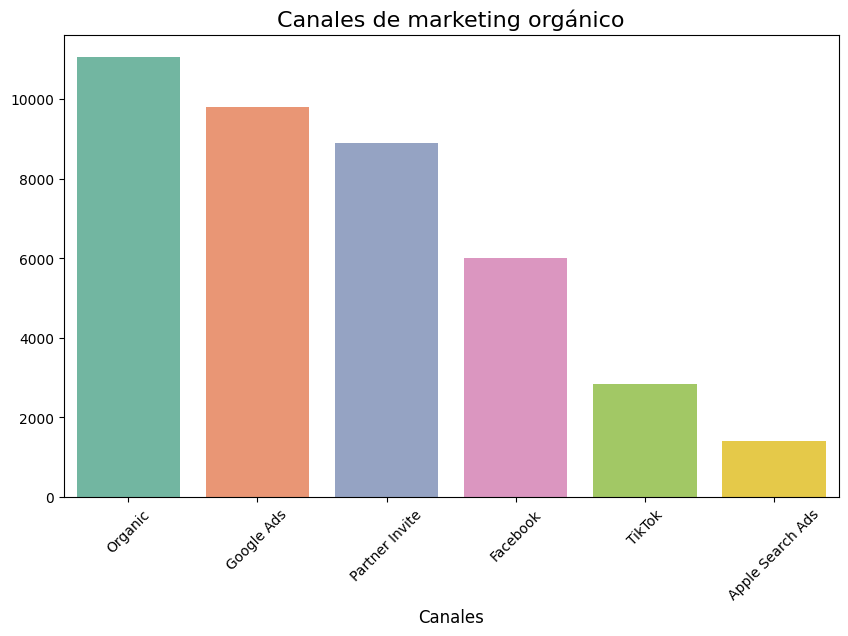

In [ ]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))


# Ordenar los canales por frecuencia
orden_canales = df['ATTRIBUTION CHANNEL'].value_counts().index

# Crear el gráfico ordenado
sns.countplot(data=df, x='ATTRIBUTION CHANNEL', palette='Set2', order=orden_canales)

# Girar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir título y etiquetas
plt.title("Canales de marketing ", fontsize=16)
plt.xlabel("Canales", fontsize=12)
plt.ylabel("", fontsize=12)


plt.show()

## Hipótesis 7

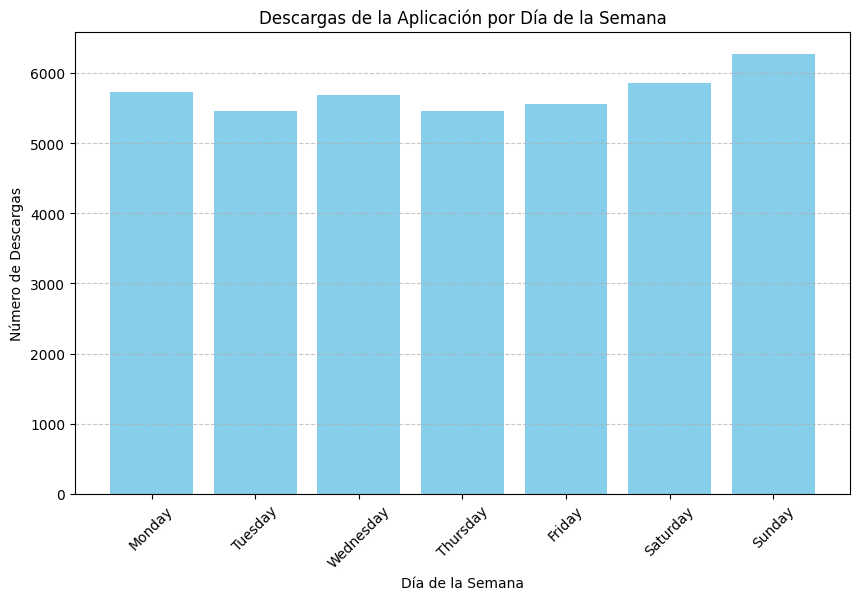

In [ ]:
#  Contar las descargas por día y visualizarlas en un gráfico de barras


# Convertir la columna a formato datetime
# pd.to_datetime() de pandas convierte los valores de texto a objetos de tipo datetime.
df['FIRST SEEN TIMESTAMP'] = pd.to_datetime(df['FIRST SEEN TIMESTAMP'])

# Extraer el día de la semana
df['DAY_OF_WEEK'] = df['FIRST SEEN TIMESTAMP'].dt.day_name() # te devuelve el día de la semana

# Contar las descargas por día de la semana
download_counts = df['DAY_OF_WEEK'].value_counts()

# Ordenar los días en el orden correcto
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
download_counts = download_counts.reindex(days_order) # esto asegura que los días aparezcan en el orden habitual, en lugar de un orden basado en frecuencia.

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(download_counts.index, download_counts.values, color='skyblue')

# Etiquetas y título
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Descargas")
plt.title("Descargas de la Aplicación por Día de la Semana")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()